In [1]:
# install fastaib
!curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


In [2]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'fastai-v3/'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai.text import *

In [5]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00462/drugsCom_raw.zip 

--2019-11-03 11:38:07--  https://archive.ics.uci.edu/ml/machine-learning-databases/00462/drugsCom_raw.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 42989872 (41M) [application/x-httpd-php]
Saving to: ‘drugsCom_raw.zip’

drugsCom_raw.zip    100%[===================>]  41.00M  30.6MB/s    in 1.3s    

2019-11-03 11:38:09 (30.6 MB/s) - ‘drugsCom_raw.zip’ saved [42989872/42989872]



In [6]:
!unzip drugsCom_raw.zip 

Archive:  drugsCom_raw.zip
  inflating: drugsComTest_raw.tsv    
  inflating: drugsComTrain_raw.tsv   


In [0]:
import pandas as pd
df = pd.read_csv('drugsComTest_raw.tsv',delimiter='\t') 

In [8]:
df.head(10)

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10.0,"February 28, 2012",22
1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8.0,"May 17, 2009",17
2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9.0,"September 29, 2017",3
3,39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9.0,"March 5, 2017",35
4,97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9.0,"October 22, 2015",4
5,208087,Zyclara,Keratosis,"""4 days in on first 2 weeks. Using on arms an...",4.0,"July 3, 2014",13
6,215892,Copper,Birth Control,"""I&#039;ve had the copper coil for about 3 mon...",6.0,"June 6, 2016",1
7,169852,Amitriptyline,Migraine Prevention,"""This has been great for me. I&#039;ve been on...",9.0,"April 21, 2009",32
8,23295,Methadone,Opiate Withdrawal,"""Ive been on Methadone for over ten years and ...",7.0,"October 18, 2016",21
9,71428,Levora,Birth Control,"""I was on this pill for almost two years. It d...",2.0,"April 16, 2011",3


In [9]:
df.shape

(53766, 7)

In [10]:
df.columns

Index(['Unnamed: 0', 'drugName', 'condition', 'review', 'rating', 'date',
       'usefulCount'],
      dtype='object')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53766 entries, 0 to 53765
Data columns (total 7 columns):
Unnamed: 0     53766 non-null int64
drugName       53766 non-null object
condition      53471 non-null object
review         53766 non-null object
rating         53766 non-null float64
date           53766 non-null object
usefulCount    53766 non-null int64
dtypes: float64(1), int64(2), object(4)
memory usage: 2.9+ MB


In [0]:
df1 = df[['review','rating']]

In [13]:
df1.head(4)

,review,rating
0,"""I&#039;ve tried a few antidepressants over th...",10.0
1,"""My son has Crohn&#039;s disease and has done ...",8.0
2,"""Quick reduction of symptoms""",9.0
3,"""Contrave combines drugs that were used for al...",9.0


In [14]:
!pip install vaderSentiment   

     |████████████████████████████████| 133kB 2.9MB/s 


In [15]:
import nltk
nltk.download(['punkt','stopwords'])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [0]:

from nltk.corpus import stopwords
stopwords = stopwords.words('english')


In [17]:
df1['cleanReview'] = df1['review'].apply(lambda x: ' '.join([item for item in x.split() if item not in stopwords]))     # remove stopwords from review

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [18]:
df1.head(10)

,review,rating,cleanReview
0,"""I&#039;ve tried a few antidepressants over th...",10.0,"""I&#039;ve tried antidepressants years (citalo..."
1,"""My son has Crohn&#039;s disease and has done ...",8.0,"""My son Crohn&#039;s disease done well Asacol...."
2,"""Quick reduction of symptoms""",9.0,"""Quick reduction symptoms"""
3,"""Contrave combines drugs that were used for al...",9.0,"""Contrave combines drugs used alcohol, smoking..."
4,"""I have been on this birth control for one cyc...",9.0,"""I birth control one cycle. After reading revi..."
5,"""4 days in on first 2 weeks. Using on arms an...",4.0,"""4 days first 2 weeks. Using arms face. Put va..."
6,"""I&#039;ve had the copper coil for about 3 mon...",6.0,"""I&#039;ve copper coil 3 months now. I really ..."
7,"""This has been great for me. I&#039;ve been on...",9.0,"""This great me. I&#039;ve 2 weeks last week I ..."
8,"""Ive been on Methadone for over ten years and ...",7.0,"""Ive Methadone ten years currently,I trying ge..."
9,"""I was on this pill for almost two years. It d...",2.0,"""I pill almost two years. It work far getting ..."


In [0]:
import vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [20]:
df1['vaderReviewScore'] = df1['cleanReview'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [21]:
df1.head()

,review,rating,cleanReview,vaderReviewScore
0,"""I&#039;ve tried a few antidepressants over th...",10.0,"""I&#039;ve tried antidepressants years (citalo...",0.7623
1,"""My son has Crohn&#039;s disease and has done ...",8.0,"""My son Crohn&#039;s disease done well Asacol....",0.4767
2,"""Quick reduction of symptoms""",9.0,"""Quick reduction symptoms""",0.0000
3,"""Contrave combines drugs that were used for al...",9.0,"""Contrave combines drugs used alcohol, smoking...",0.8115
4,"""I have been on this birth control for one cyc...",9.0,"""I birth control one cycle. After reading revi...",0.9619


In [0]:
positive_num = len(df1[df1['vaderReviewScore'] >=0.05])
neutral_num = len(df1[(df1['vaderReviewScore'] >-0.05) & (df1['vaderReviewScore']<0.05)])
negative_num = len(df1[df1['vaderReviewScore']<=-0.05])

In [23]:
df1['vaderSentiment']= df1['vaderReviewScore'].map(lambda x:int(2) if x>=0.05 else int(1) if x<=-0.05 else int(0) )

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [24]:
Total_vaderSentiment = positive_num + neutral_num + negative_num
Total_vaderSentiment

53766

In [25]:
df1.loc[df1['vaderReviewScore'] >=0.05,"vaderSentimentLabel"] ="positive"
df1.loc[(df1['vaderReviewScore'] >-0.05) & (df1['vaderReviewScore']<0.05),"vaderSentimentLabel"]= "neutral"
df1.loc[df1['vaderReviewScore']<=-0.05,"vaderSentimentLabel"] = "negative"

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [26]:
df1.head(3)

,review,rating,cleanReview,vaderReviewScore,vaderSentiment,vaderSentimentLabel
0,"""I&#039;ve tried a few antidepressants over th...",10.0,"""I&#039;ve tried antidepressants years (citalo...",0.7623,2,positive
1,"""My son has Crohn&#039;s disease and has done ...",8.0,"""My son Crohn&#039;s disease done well Asacol....",0.4767,2,positive
2,"""Quick reduction of symptoms""",9.0,"""Quick reduction symptoms""",0.0000,0,neutral


In [0]:
cols = df1.columns.tolist()
cols = cols[-1:] + cols[:-1]
df1 = df1[cols]

In [28]:
df1.head(3)

,vaderSentimentLabel,review,rating,cleanReview,vaderReviewScore,vaderSentiment
0,positive,"""I&#039;ve tried a few antidepressants over th...",10.0,"""I&#039;ve tried antidepressants years (citalo...",0.7623,2
1,positive,"""My son has Crohn&#039;s disease and has done ...",8.0,"""My son Crohn&#039;s disease done well Asacol....",0.4767,2
2,neutral,"""Quick reduction of symptoms""",9.0,"""Quick reduction symptoms""",0.0000,0


In [29]:
df1['cleanReview'][1]

'"My son Crohn&#039;s disease done well Asacol. He complaints shows side effects. He taken many nine tablets per day one time. I&#039;ve happy results, reducing bouts diarrhea drastically."'

Loading only few training and validation samples, for quick training time

In [0]:
train_texts = df1.loc[0:26000, 'review'].values
train_labels = df1.loc[0:26000, 'vaderSentimentLabel'].values
valid_texts = df1.loc[26001:53765, 'review'].values
valid_labels = df1.loc[26001:53765, 'vaderSentimentLabel'].values

np.random.seed(42)
train_idx = np.random.permutation(len(train_texts))
valid_idx = np.random.permutation(len(valid_texts))

train_texts = train_texts[train_idx]
valid_texts = valid_texts[valid_idx]
train_labels = train_labels[train_idx]
valid_labels = valid_labels[valid_idx]
col_names = ['vaderSentimentLabel','review']
df_train = pd.DataFrame({'review':train_texts, 'vaderSentimentLabel':train_labels}, columns=col_names)
df_valid = pd.DataFrame({'review':valid_texts, 'vaderSentimentLabel':valid_labels}, columns=col_names)

In [31]:
df_valid['vaderSentimentLabel'].value_counts()

negative    13297
positive    13054
neutral      1414
Name: vaderSentimentLabel, dtype: int64

It contains one line per review, with the label ('negative' or 'positive'), the text and a flag to determine if it should be part of the validation set or the training set. If we ignore this flag, we can create a DataBunch containing this data in one line of code:

In [0]:
data_lm = TextDataBunch.from_df('./', train_df= df_train ,valid_df = df_valid)

In [0]:
data_lm.save()

In [34]:
data = TextClasDataBunch.from_df('./', train_df= df_train ,valid_df = df_valid)
data.show_batch()

text,target
"xxbos "" • \t 19 xxmaj apr. 2016 \r\r \n \r\r \n xxmaj began initial dose at xxunk hours . xxmaj felt the medicine working within a ½ hour . xxmaj was in a good mood as i had been taken off of xxmaj warfarin this date . xxmaj before drifting off to sleep , i xxunk at the clock . xxmaj it was approx . xxunk hrs .",negative
"xxbos "" i want to qualify my comments by xxunk i have only been on xxmaj contrave for a week . xxmaj my intention is to comment periodically as i am on the med longer . \r \n \r \n i was very nervous about starting xxmaj contrave given what i had read about the side effects . i don%u2019 t take meds very often , and i did",positive
"xxbos "" i have been diagnosed with xxup add . i have always pushed myself to get good grades and to take as many xxup ap and honors classes as i can handle . i enjoy learning about new things ; however , my lack of focus got in the way of my learning . xxmaj it bothers me when people say xxup add / xxup adhd is made up",positive
"xxbos "" xxmaj glucophage xxup xr 500 mg or 1000 mg xxmaj tabs ( i either take 2~500 mg xxmaj tabs in the xxmaj morning and 2~500 mg xxmaj tabs with xxmaj dinner / xxmaj supper , or i take 1~1000 mg xxmaj tab in the xxmaj morning and 1~1000 mg xxmaj tab with xxmaj dinner / xxmaj supper . ) \r \n i xxmaj totally xxmaj love this",positive
"xxbos "" 2 yrs on generic suboxone tablets ( xxmaj xxunk xxmaj labs or xxmaj amneal brands only decent generics ) . i 've tried to tapper with my xxmaj doc once but mentally was n't ready . xxmaj dosage was 16 mg / day or xxunk mg / day . \r \n xxmaj found out xxmaj my insurance copay is the same on xxmaj zubsolv ( name brand",positive


In [35]:
data.vocab.itos[:10]

['xxunk',
 'xxpad',
 'xxbos',
 'xxeos',
 'xxfld',
 'xxmaj',
 'xxup',
 'xxrep',
 'xxwrep',
 '.']

In [36]:
data.train_ds[0][0]

Text xxbos " xxmaj it works just as well or better than the regular / tab pills . 
 
  xxmaj it 's onset it fast , 10 minutes after completely dissolved under the tongue * sub - lingual * obviously . xxmaj it has a bad sweet taste but i got used to it quickly . xxmaj takes about 8 minutes to dissolve . xxmaj there 's no heaviness like the xxup cr 's or anything like that . xxmaj seems it does the trick for easier and faster sleep . "

In [37]:
data.train_ds[0][0].data[:5]

array([  2,  14,   5,  16, 153])

**With the data block API** though, we have to manually call the tokenize and numericalize steps. This allows more flexibility, and if you're not using the defaults from fastai, the various arguments to pass will appear in the step they're revelant, so it'll be more readable.bold text

In [0]:
data = (TextList.from_df(df1,".", cols='review')
                .split_by_rand_pct(0)
                .label_from_df(cols= 0)
                .databunch())

**Language** **model**





In [0]:
bs=48

In [0]:
data_lm = (TextList.from_df(df1,".",cols='review')
            .split_by_rand_pct(0.1)
           #We randomly split and keep 10% (50,000 reviews) for validation
            .label_for_lm()           
           #We want to do a language model so we label accordingly
            .databunch(bs=bs))
data_lm.save('data_lm.pkl')

We have to use a special kind of TextDataBunch for the language model, that ignores the labels (that's why we put 0 everywhere), will shuffle the texts at each epoch before concatenating them all together (only for training, we don't shuffle for the validation set) and will send batches that read that text in order with targets that are the next word in the sentence.
The line before being a bit long, we want to load quickly the final ids by using the following cell.

In [0]:
data_lm = load_data(".", 'data_lm.pkl', bs=bs)

In [42]:
data_lm.show_batch()

idx,text
0,"were used for alcohol , smoking , and opioid cessation . xxmaj people lose weight on it because it also helps control over - eating . i have no doubt that most obesity is caused from sugar / carb addiction , which is just as powerful as any drug . i have been taking it for five days , and the good news is , it seems to go to"
1,"swelling , eventually he had to stop the drug . xxmaj still going strong today ! xxmaj great drug with tolerable side effects thank you "" xxbos "" xxmaj finished my first dose about an hour and a half ago . xxmaj the worst part of this whole experience , which was my first , was the anxiety of not knowing what to expect , not being able to eat"
2,"time so i 'm not sure what happened but now i will be changing to a different birth control . "" xxbos "" i have used this medication successfully for years . xxmaj initially i used it daily for a few weeks , then tapered down to 3 times a weeks , then only 3 days in a row for flare ups . i have n't used any for 3"
3,"i was always on edge . xxmaj my appetite was cut in half . i get blurry vision and drowsiness when i have migraines and amitriptyline helps with that . i have had migraines for the past 3 year everyday and this did not help . "" xxbos "" xxmaj rating on xxmaj experience . xxmaj kyleena was placed 3 days ago on last day of my cycle . xxmaj"
4,"it is low dose but i 'm just not sure it 's right for me . xxmaj will probably call my doctor xxmaj monday . xxmaj was so hopeful this could help me . xxmaj also xxrep 4 . moderate menstrual cramps experienced on this pill . i have n't had those in years . "" xxbos "" i take this medicine for xxunk morning sickness . i would have"


We can then put this in a learner object very easily with a model loaded with the pretrained weights. They'll be downloaded the first time you'll execute the following line and stored in ~/.fastai/models/ (or elsewhere if you specified different paths in your config file).

In [0]:
learn = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.3)

In [44]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


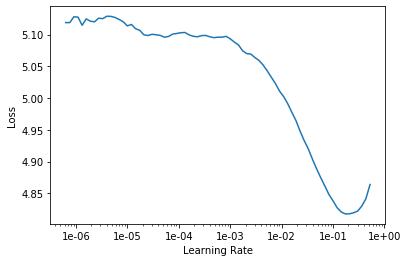

In [45]:
learn.recorder.plot(skip_end=15)

In [46]:
learn.fit_one_cycle(1, 1e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,3.511788,3.400252,0.315682,09:13


In [0]:
learn.save('fit_head')

In [0]:
learn.load('fit_head');

To complete the fine-tuning, we can then unfeeze and launch a new training.

In [0]:
learn.unfreeze()

In [50]:
learn.fit_one_cycle(5, 1e-3, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,3.238178,3.226262,0.337470,11:07
1,3.120642,3.117707,0.351624,11:07
2,2.945405,3.049683,0.361669,11:06
3,2.812815,3.019212,0.367963,11:07
4,2.666212,3.024902,0.368417,11:07


In [0]:
learn.save('fine_tuned')

How good is our model? Well let's try to see what it predicts after a few given words.

In [0]:
TEXT = "process was not painful"
N_WORDS = 40
N_SENTENCES = 2


In [53]:
print("\n".join(learn.predict(TEXT, N_WORDS, temperature=0.75) for _ in range(N_SENTENCES)))

process was not painful at all . Used it for a week and a half , it worked fine . " xxbos " i have Irritable Bowel Syndrome - Constipation . For over 30 years i have been
process was not painful at all . It took me 8 to 12 months to get it out and the side effects are horrible . Doctors do n't know what to do . It 's been 6 months since i got


We have to save not only the model, but also its encoder, the part that's responsible for creating and updating the hidden state. For the next part, we don't care about the part that tries to guess the next word.

In [0]:
learn.save_encoder('fine_tuned_enc')

**Classifier**


Now, we'll create a new data object that only grabs the labelled data and keeps those labels. Again, this line takes a bit of time.

In [0]:
data_clas = (TextList.from_df(df1,".",cols= 'review', vocab=data_lm.vocab)
             #grab all the text files in path
             .split_by_rand_pct(0.3)
             #split by train and valid folder (that only keeps 'train' and 'test' so no need to filter)
             .label_from_df(cols='vaderSentimentLabel')
             #label them all with their folders
             .databunch(bs=bs))

data_clas.save('data_clas.pkl')

In [0]:
data_clas = load_data(".", 'data_clas.pkl', bs=bs)

In [57]:
data_clas.show_batch()

text,target
"xxbos "" i do n’t find a lot of positive stories about antidepressants , or i find stories where people are taking the antidepressant the wrong way . \r \n \r \n i wanted to share my experience . a positive one . \r \n \r \n i ’ve had generalized anxiety disorder , xxup severe xxup ocd , and panic disorder for as long as i can",negative
"xxbos "" xxmaj my colonoscopy was booked in for late afternoon on a xxmaj thursday . xxmaj the hospital said to stop eating anything from 1 pm on the xxmaj wednesday and recommended ( giving some detail ) a non fibre diet from xxmaj tuesday evening until xxmaj wednesday noon - avoiding dark drinks and jelly ( like xxunk flavour ) . xxmaj avoid red meat , sausages and pies",positive
"xxbos "" i felt compelled to write a review , as i was on topamax ( or should i say xxunk ? ! ) for about 2 years . i started this medication when i was 21 and was so desperate to find something that would actually help my on - going migraines . xxmaj personally , the side effect symptoms xxup far outweighed the benefits . i started out",negative
"xxbos "" i have dealt with ups and downs , anxiety , social anxiety , depression etc . etc . for years . xxmaj my life overall is normal and i managed the episodes but i always knew they were there and did n't like feeling that way . i am married we have children combine that with everything else and it times it was just too much . xxmaj",positive
"xxbos "" xxmaj following a stroke in xxmaj june 2014 , that xxmaj christmas i had become aware of an extremely unpleasant discomfort everywhere but particularly my hands / arms / legs and feet this led to 7 months of tests / scans / x - rays to try and determine what was the cause . \r \n xxmaj then finally a neurologist diagnosed central post stroke pain .",negative


We can then create a model to classify those reviews and load the encoder we saved before.

In [58]:
learn = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.5)
learn.load_encoder('fine_tuned_enc')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (37637 items)
x: TextList
xxbos " i 've tried a few antidepressants over the years ( citalopram , fluoxetine , amitriptyline ) , but none of those helped with my depression , insomnia & & anxiety . xxmaj my doctor suggested and changed me onto 45 mg mirtazapine and this medicine has saved my life . xxmaj thankfully i have had no side effects especially the most common - weight gain , i 've actually lost alot of weight . i still have suicidal thoughts but mirtazapine has saved me . ",xxbos " xxmaj my son has xxmaj crohn 's disease and has done very well on the xxmaj asacol . xxmaj he has no complaints and shows no side effects . xxmaj he has taken as many as nine tablets per day at one time . i 've been very happy with the results , reducing his bouts of diarrhea drastically . ",xxbos " xxmaj quick reduction of symptoms ",xxbos " xxmaj contrave xxunk drugs that were used for alcohol , smoking , and opioid cessation . xxmaj people lose

In [59]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


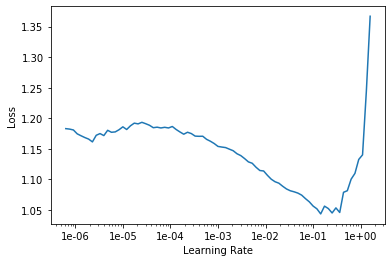

In [60]:
learn.recorder.plot()

In [61]:
learn.fit_one_cycle(1, 2e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.737575,0.677048,0.687891,03:55


In [0]:
learn.save('first')

In [0]:
learn.load('first');

In [64]:
learn.freeze_to(-2)
learn.fit_one_cycle(1, slice(1e-2/(2.6**4),1e-2), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.607269,0.565209,0.762602,04:27


In [0]:
learn.save('second')

In [0]:
learn.load('second');

In [67]:
learn.freeze_to(-3)
learn.fit_one_cycle(2, slice(5e-3/(2.6**4),5e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.510414,0.459329,0.816976,07:37
1,0.430796,0.416069,0.840474,06:49


In [0]:
learn.save('third')

In [0]:
learn.load('third');

In [70]:
learn.unfreeze()
learn.fit_one_cycle(2, slice(1e-3/(2.6**4),1e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.376209,0.407047,0.846798,08:54
1,0.364577,0.400758,0.847480,08:51


In [71]:
learn.predict(" i have used this medication")

(Category neutral, tensor(1), tensor([0.0395, 0.8288, 0.1317]))

In [72]:
learn.predict(" i do n’t find a lot of positive stories about antidepressants")

(Category positive, tensor(2), tensor([0.0815, 0.0024, 0.9162]))

In [73]:
 learn.predict("i had become aware of an extremely unpleasant discomfort everywhere but particularly my hands")

(Category negative, tensor(0), tensor([0.9970, 0.0010, 0.0019]))

In [84]:
 learn.predict("its worse pain even after taking the medicine")

(Category negative, tensor(0), tensor([1.0000e+00, 9.5813e-09, 1.1830e-08]))

In [78]:
learn.predict("drug as worse side effects")

(Category negative, tensor(0), tensor([9.9999e-01, 1.0508e-05, 1.3169e-06]))

In [82]:
learn.predict("medicines worked successfully")

(Category positive, tensor(2), tensor([0.0745, 0.1275, 0.7980]))

In [90]:
learn.predict("Drug helped me recover soon with 3 weeks , its good medcine ")

(Category positive, tensor(2), tensor([5.9836e-04, 1.3734e-04, 9.9926e-01]))